# Xray tomography using regularised linear least squares #

In [3]:
from InversionTestProblems import xrayTomography as xrt_fcn
xrt_basics=xrt_fcn.Basics()
xrt_basics.model_size=50
xrt_basics.epsSquared = 0.005
xrt_basics.subset = 1 # subset in percent of all data (chosen randomly)
xrt_basics.noise=0.0  # Noise in percent of highest number in xrt.data 
model=xrt_fcn.init_routine(xrt_basics)
synthetics, gradient = xrt_fcn.forward(xrt_basics, model)
result= xrt_fcn.solver(xrt_basics, model, synthetics, gradient)
xrt_fcn.plot_model(xrt_basics, result)

Evaluating paths: 100%|██████████| 3969/3969 [00:00<00:00, 5225.44it/s]


# Earthquake location using the squares iterative solution # 

 Iteration  0 Chisq  2700.705277357193  Current location -5.0000 20.0000 25.0000  0.0000
 Iteration  1 Chisq  1631.3018304148243  Current location 16.2687 -8.1728 19.9901  6.0567
 Iteration  2 Chisq  55.985665483299734  Current location  8.8322  1.6700 13.0967  5.1550
 Iteration  3 Chisq  0.2666437570007426  Current location 10.0891 -0.0806 10.2577  5.0085
 Iteration  4 Chisq  1.4286067424252347e-05  Current location  9.9994  0.0003 10.0013  5.0002
 Iteration  5 Chisq  8.571772985099102e-15  Current location 10.0000 -0.0000 10.0000  5.0000
 Iteration  6 Chisq  7.888609052210117e-29  Current location 10.0000  0.0000 10.0000  5.0000
 Iteration  7 Chisq  7.888609052210117e-29  Current location 10.0000  0.0000 10.0000  5.0000
 Iteration  8 Chisq  7.888609052210117e-29  Current location 10.0000  0.0000 10.0000  5.0000
 Iteration  9 Chisq  1.5777218104420234e-28  Current location 10.0000 -0.0000 10.0000  5.0000

Station arrival time residuals for each iteration

                0       1    

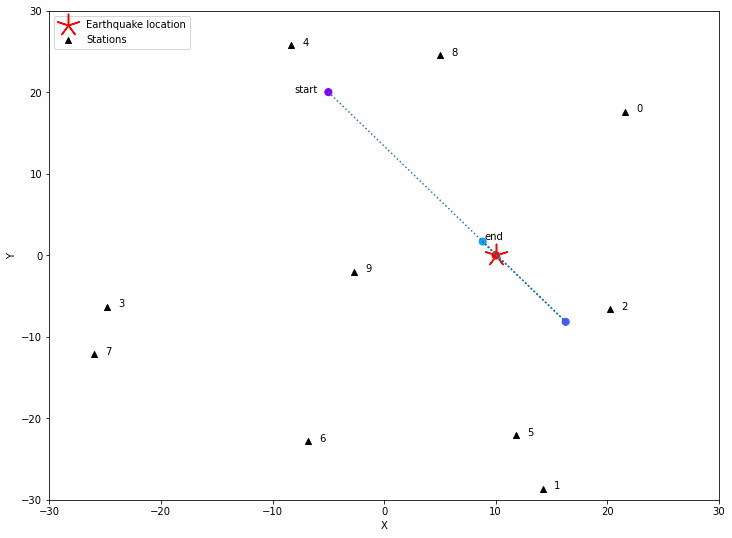

In [4]:
from InversionTestProblems import Earthquake_Leastsquares as eql_fcn
eql_basics=eql_fcn.Earthquake()
eql_basics.nit=10 # Iterations
eql_basics.n_used=10 # No of stations used (0-10)
eql_basics.model = [-5.0, 20.0, 25.0, 0.0] # Start earthquake location
eql_basics.noise=0 # Noise; [0:1] of maximum value of eql_basics.data
model=eql_fcn.init_routine(eql_basics)
synthetic, gradient = eql_fcn.forward(eql_basics, model)
result= eql_fcn.solver(eql_basics, model, synthetic, gradient)
eql_fcn.plot_model(eql_basics, result)

# Earthquake uncertainty estimation using bootstrap # 

Earthquake location (iterative least square solution):
 [7.554340136266301, 47.21934668511463, -10.0]
Event time (seconds after 16:30) 40.1000936374443


/home/hannesh/Documents/ANU/CoFi_TestSuite/InversionTestProblems/Earthquake_Bootstrap_data/eqlocate.py:75: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m=np.linalg.lstsq(G,res)[0]


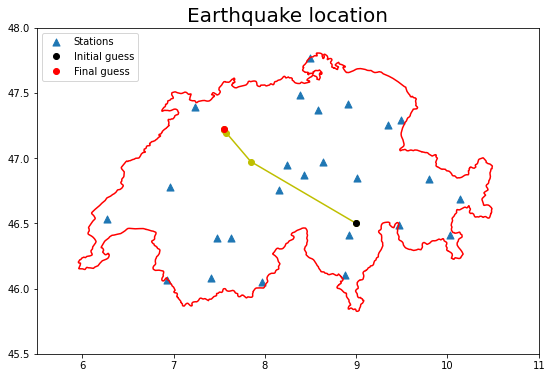

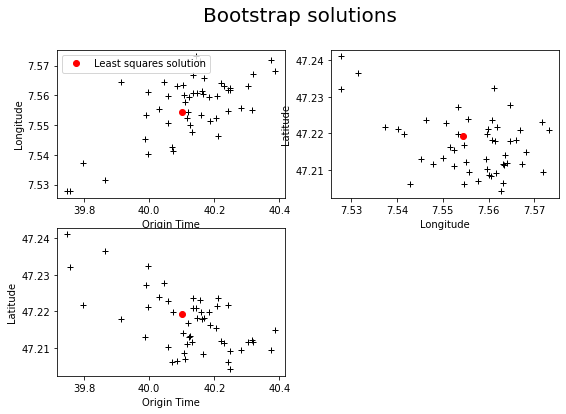

 Bootstrap mean earthquake location:
 [ 40.22238415   7.55650648  47.21867647 -10.        ]
 Bootstrap mean event time (seconds after 16:30):
 21.207181155748508
 Bootstrap covariance:
 [[ 1.99203405e-02  1.02065445e-03 -7.09684220e-04  0.00000000e+00]
 [ 1.02065445e-03  1.13920966e-04 -3.66596551e-05  0.00000000e+00]
 [-7.09684220e-04 -3.66596551e-05  6.60314397e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
 Bootstrap bias corrected solution:
 [ 40.07655169   7.55257004  47.22154223 -10.        ]
 Bootstrap 95% Confidence intervals: 
 Parameter 1  40.077 [ 39.765,  40.362]
 Parameter 2   7.553 [  7.529,   7.572]
 Parameter 3  47.222 [ 47.206,  47.236]


In [2]:
from InversionTestProblems import Earthquake_Bootstrap as eql_fcn
eql_basics=eql_fcn.Earthquake()
eql_basics.model = [9, 46.5, -10.0] # Start earthquake location
eql_basics.nBoot=50 # Number of bootstrap subsets / iterations
model=eql_fcn.init_routine(eql_basics)
synthetic, gradient = eql_fcn.forward(eql_basics, model)
result= eql_fcn.solver(eql_basics, model, synthetic, gradient)
eql_fcn.plot_model(eql_basics, result)

# Gravity forward modelling #

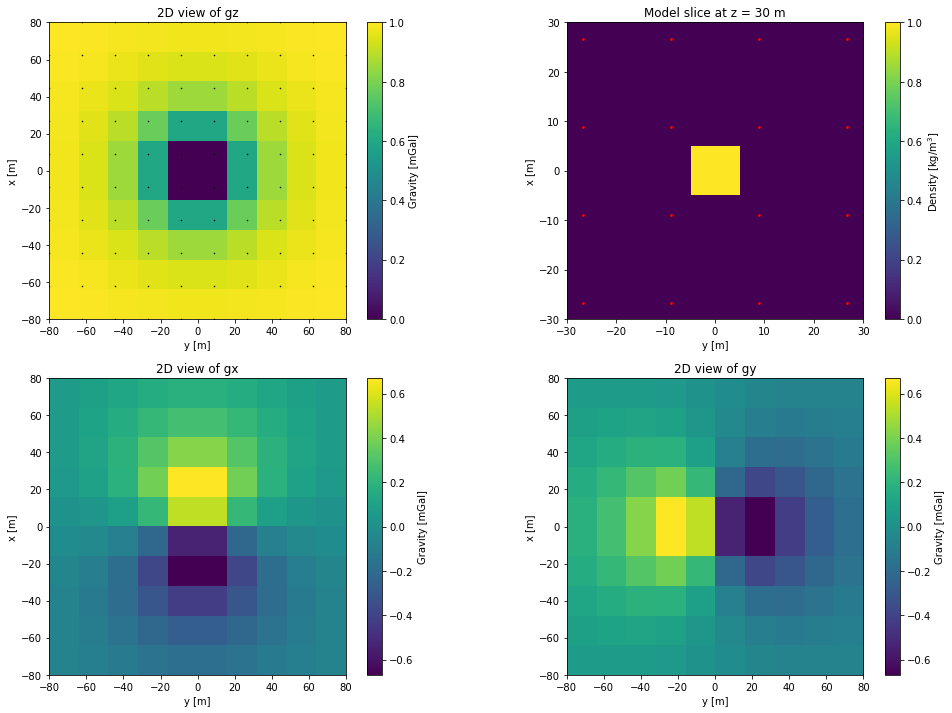

In [5]:
import numpy as np

from InversionTestProblems import GravityForward as g_fcn

grav_basics=g_fcn.Basics()
grav_basics.anomaly_density=200
grav_basics.background_density=0
grav_basics.x_rec=np.linspace(-80.0, 80.0, 10)
grav_basics.y_rec=np.linspace(-80.0, 80.0, 10)

model=g_fcn.init_routine(grav_basics)

synthetics, gradient = g_fcn.forward(grav_basics, model)

g_fcn.plot_model(grav_basics, model, synthetics)